In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm
from tabulate import tabulate
from IPython.display import display, Markdown
import matplotlib.pyplot as plt   # load pyplot package

In [2]:
## Define the prior on a parameter space of size two

p = .4

q = 1-p

prior = [p,q]

In [3]:
## Define how big the sample space is

n = 10 # number of outcomes

size_sample_space = n

size_parameter_space = 2

sample_space = list(range(size_sample_space))

parameter_space = list(range(size_parameter_space))

In [4]:
## Define the likelihood function

likelihood = [None] * size_parameter_space


## This one sets it randomly 


#for i in parameter_space:
#    likelihood[i] = np.random.dirichlet(np.ones(len(sample_space)),size=1)[0]
#    likelihood[i] = [round(x, 2) for x in likelihood[i]]

## this one selects 0 to be normal and 1 to be uniform

import numpy as np

import matplotlib.pyplot as plt

# Define the parameters of the normal distribution
mean = size_sample_space / 2
std_dev = size_sample_space / 5


sample_space_alt = np.linspace(mean - 3*std_dev, mean + 3*std_dev, size_sample_space)
likelihood[0] = norm.pdf(sample_space, mean, std_dev)
likelihood[1] = [1/size_sample_space]*size_sample_space

print(likelihood)


[array([0.00876415, 0.02699548, 0.0647588 , 0.12098536, 0.17603266,
       0.19947114, 0.17603266, 0.12098536, 0.0647588 , 0.02699548]), [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]]


In [5]:

parameter_space_names = []
for i in parameter_space:
    parameter_space_names.append(f"likelihood p(x_j  &#124; θ_{i})")

print(parameter_space_names)

['likelihood p(x_j  &#124; θ_0)', 'likelihood p(x_j  &#124; θ_1)']


In [6]:
evidence =  []

for j in sample_space:
    evidence.append(sum([prior[i]*likelihood[i][j] for i in parameter_space]))

evidence = [round(x, 2) for x in evidence]

print(evidence)

[0.06, 0.07, 0.09, 0.11, 0.13, 0.14, 0.13, 0.11, 0.09, 0.07]


In [7]:

sample_space_names = []

for j in sample_space:
    sample_space_names.append(f"x_{j}, evidence = {evidence[j]}")

print(sample_space_names)

['x_0, evidence = 0.06', 'x_1, evidence = 0.07', 'x_2, evidence = 0.09', 'x_3, evidence = 0.11', 'x_4, evidence = 0.13', 'x_5, evidence = 0.14', 'x_6, evidence = 0.13', 'x_7, evidence = 0.11', 'x_8, evidence = 0.09', 'x_9, evidence = 0.07']


In [8]:
df = pd.DataFrame(likelihood)

df = df.T

df.columns = parameter_space_names

df.index = sample_space_names


markdown_table = df.to_markdown()

display(Markdown(markdown_table))

|                      |   likelihood p(x_j  &#124; θ_0) |   likelihood p(x_j  &#124; θ_1) |
|:---------------------|--------------------------------:|--------------------------------:|
| x_0, evidence = 0.06 |                      0.00876415 |                             0.1 |
| x_1, evidence = 0.07 |                      0.0269955  |                             0.1 |
| x_2, evidence = 0.09 |                      0.0647588  |                             0.1 |
| x_3, evidence = 0.11 |                      0.120985   |                             0.1 |
| x_4, evidence = 0.13 |                      0.176033   |                             0.1 |
| x_5, evidence = 0.14 |                      0.199471   |                             0.1 |
| x_6, evidence = 0.13 |                      0.176033   |                             0.1 |
| x_7, evidence = 0.11 |                      0.120985   |                             0.1 |
| x_8, evidence = 0.09 |                      0.0647588  |                             0.1 |
| x_9, evidence = 0.07 |                      0.0269955  |                             0.1 |

In [9]:
posterior = [[None]*size_sample_space for _ in range(size_parameter_space)]

for i in parameter_space:
    for j in sample_space:
        posterior[i][j] = ((likelihood[i][j]*prior[i]) / evidence[j])
        posterior[i][j] = round(posterior[i][j], 2)

print(posterior)


[[0.06, 0.15, 0.29, 0.44, 0.54, 0.57, 0.54, 0.44, 0.29, 0.15], [1.0, 0.86, 0.67, 0.55, 0.46, 0.43, 0.46, 0.55, 0.67, 0.86]]


In [10]:
for i in parameter_space:
    df.insert(2*i+1, f"posterior p(θ_ {i}  &#124; x_j)", posterior[i])

markdown_table = df.to_markdown()

display(Markdown(markdown_table))

    

|                      |   likelihood p(x_j  &#124; θ_0) |   posterior p(θ_ 0  &#124; x_j) |   likelihood p(x_j  &#124; θ_1) |   posterior p(θ_ 1  &#124; x_j) |
|:---------------------|--------------------------------:|--------------------------------:|--------------------------------:|--------------------------------:|
| x_0, evidence = 0.06 |                      0.00876415 |                            0.06 |                             0.1 |                            1    |
| x_1, evidence = 0.07 |                      0.0269955  |                            0.15 |                             0.1 |                            0.86 |
| x_2, evidence = 0.09 |                      0.0647588  |                            0.29 |                             0.1 |                            0.67 |
| x_3, evidence = 0.11 |                      0.120985   |                            0.44 |                             0.1 |                            0.55 |
| x_4, evidence = 0.13 |                      0.176033   |                            0.54 |                             0.1 |                            0.46 |
| x_5, evidence = 0.14 |                      0.199471   |                            0.57 |                             0.1 |                            0.43 |
| x_6, evidence = 0.13 |                      0.176033   |                            0.54 |                             0.1 |                            0.46 |
| x_7, evidence = 0.11 |                      0.120985   |                            0.44 |                             0.1 |                            0.55 |
| x_8, evidence = 0.09 |                      0.0647588  |                            0.29 |                             0.1 |                            0.67 |
| x_9, evidence = 0.07 |                      0.0269955  |                            0.15 |                             0.1 |                            0.86 |

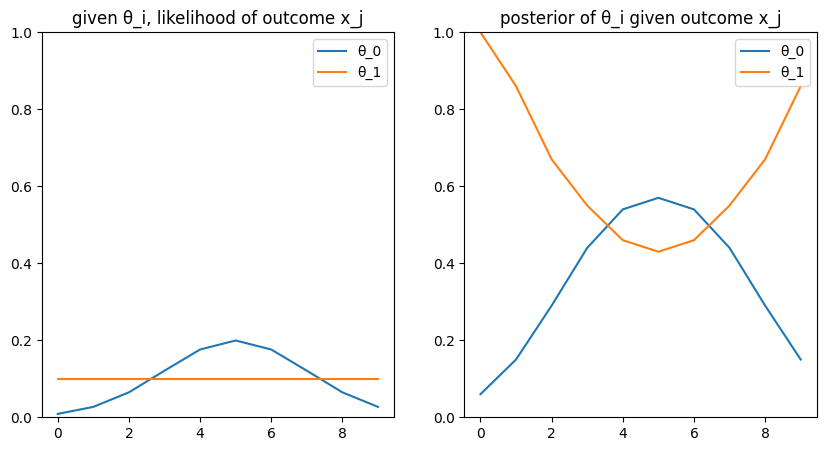

In [11]:
## Code to generate table and calculate evidence and posteriors and plot


fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

axs[0].plot(sample_space, likelihood[0], label='θ_0')
axs[0].plot(sample_space, likelihood[1], label='θ_1')
axs[0].set_ylim(0, 1)
axs[0].set_title('given θ_i, likelihood of outcome x_j')
axs[0].legend()

axs[1].plot(sample_space, posterior[0], label='θ_0')
axs[1].plot(sample_space, posterior[1], label='θ_1')
axs[1].set_ylim(0, 1)
axs[1].set_title('posterior of θ_i given outcome x_j')
axs[1].legend()



### Theorem (Bayes' Theorem)

Suppose that the sample space $\Omega\subseteq \mathbb{R}$ is finite. Since they are real numbers we write $x$ for elements of $\Omega$.

Suppose that the parameter space $\Theta\subseteq \mathbb{R}$ is finite.

Suppose that each $\theta$ in $\Theta$ comes equipped with a probability measure $P_{\theta}$ on $\Omega$. Let us write $p(x \mid \theta)=P_{\theta}(\{x\})$.

Suppose further that we have a probability measure $P$ on $\Theta$, the *prior*. Let us write $p(\theta)=P(\{\theta\})$.

Consider the product space $\Omega \times \Theta$, which is also finite.

Define a probability measure $Pr$ on $\Omega\times \Theta$ by $Pr(C\times D)=\sum_{\theta\in D} p(\theta)\cdot P_{\theta}(C)$, and let us write $p(\theta, x)=Pr(\{x\}\times \{\theta\})=p(\theta)\cdot p(x \mid \theta)$.

Define the first projection $X:\Omega \times \Theta\rightarrow \mathbb{R}$ by $X(x, \theta)=x$.

Define the second projection $Y:\Omega \times \Theta\rightarrow \mathbb{R}$ by $Y(x, \theta)=\theta$.

Define $p(x) = Pr(X=x)$

Define $p(\theta \mid x)=Pr(Y=\theta \mid X=x)$.

Then $p(x) = \sum_{\theta\in \Theta} p(\theta)\cdot p(x \mid \theta)$. 

Further one has

$$p(\theta \mid x) = \frac{p(\theta)\cdot p(x \mid \theta)}{p(x)}$$

For the first one has: 

$p(x) = Pr(X=x) = Pr(\{x\}\times \Theta) = \sum_{\theta\in \Theta} p(\theta)\cdot P_{\theta}(\{x\}) = \sum_{\theta\in \Theta} p(\theta)\cdot p(x \mid \theta)$.

For the second we first note two things:

$Pr(Y=\theta) = Pr(\Omega \times \{\theta\}) = p(\theta)\cdot P_{\theta}(\Omega)=p(\theta)\cdot 1 = p(\theta)$.

$P(X=x \mid Y=\theta) = \frac{Pr(X=x\wedge Y=\theta)}{Pr(Y=\theta)} = \frac{Pr(\{x\}\times \{\theta\})}{p(\theta)} = \frac{p(\theta)\cdot p(x \mid \theta)}{p(\theta)} =  p(x \mid \theta)$.

Then we have:

$p(\theta \mid x)=Pr(Y=\theta \mid X=x) = \frac{P(X=x \mid Y=\theta)\cdot P(Y=\theta)}{P(X=x)}=\frac{ p(x \mid \theta)\cdot p(\theta)}{p(x)}$.









## We don't talk about Pr (no no)